In [16]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import anytree
from anytree import Node, RenderTree
import random
from anytree.exporter import DotExporter
from anytree.dotexport import RenderTreeGraph
from graphviz import Source

In [17]:
DG = nx.DiGraph()

In [18]:
df = pd.read_csv('alphabet4.csv')
df.head()

,test col 1,test col 2,test col 3,subsidiary,test col 4,test col 5,test col 6,test col 7,test col 8,test col 9,parent,test col 10
0,x,y,z,nest,a,b,-,b,a,d,alphabet,3.0
1,x,y,z,access and energy,a,b,-,b,a,d,alphabet,4.0
2,x,y,z,verily,a,b,-,b,a,d,alphabet,5.0
3,x,z,z,calico,a,b,-,b,a,d,alphabet,6.0
4,x,z,z,side walk labs,a,b,-,b,a,d,alphabet,7.0


In [19]:
print('Selection 1:')
for col in df.columns: 
    print(col)
    
parent_col = input("Please enter parent column from the above selection: ")

print('\n' + 'Selection 2:')
for col in df.columns: 
    print(col)
    
child_col = input("Please enter child column from the above selection: ")

Selection 1:
test col 1
test col 2
test col 3
subsidiary
test col 4
test col 5
test col 6
test col 7
test col 8
test col 9
parent
test col 10
Please enter parent column from the above selection: parent

Selection 2:
test col 1
test col 2
test col 3
subsidiary
test col 4
test col 5
test col 6
test col 7
test col 8
test col 9
parent
test col 10
Please enter child column from the above selection: subsidiary


In [20]:
print('Selection 3:')
for unique in list(set(df[parent_col])):
    print(unique)
    
parent = input("Please enter parent node from the above selection: ")

Selection 3:
google
check
alphabet
google X
test
adsense
error
Please enter parent node from the above selection: alphabet


In [21]:
working_list = []
for i,j in df.iterrows():
     if df[parent_col][i] == parent:
            working_list.append([df[parent_col][i], df[child_col][i]])

for i,j in working_list:
    for k,l in df.iterrows():
        if df[parent_col][k] == j:
            working_list.append([j, df[child_col][k]])


working_list

[['alphabet', 'nest'],
 ['alphabet', 'access and energy'],
 ['alphabet', 'verily'],
 ['alphabet', 'calico'],
 ['alphabet', 'side walk labs'],
 ['alphabet', 'google'],
 ['alphabet', 'google X'],
 ['alphabet', 'gv'],
 ['alphabet', 'google capital'],
 ['alphabet', 'self driving car'],
 ['google', 'search'],
 ['google', 'infrastructure'],
 ['google', 'adsense'],
 ['google', 'maps'],
 ['google', 'apps for work'],
 ['google', 'android'],
 ['google', 'deepmind'],
 ['google', 'atap'],
 ['google X', 'replicant'],
 ['google X', 'project loon'],
 ['google X', 'project wing'],
 ['google X', 'project titan'],
 ['google X', 'youtube'],
 ['adsense', 'test'],
 ['test', 'test2']]

In [22]:
nodes = set(x for l in working_list for x in l)
nodes

{'access and energy',
 'adsense',
 'alphabet',
 'android',
 'apps for work',
 'atap',
 'calico',
 'deepmind',
 'google',
 'google X',
 'google capital',
 'gv',
 'infrastructure',
 'maps',
 'nest',
 'project loon',
 'project titan',
 'project wing',
 'replicant',
 'search',
 'self driving car',
 'side walk labs',
 'test',
 'test2',
 'verily',
 'youtube'}

In [23]:
DG.add_nodes_from(nodes)
DG.nodes

NodeView(('project titan', 'side walk labs', 'alphabet', 'access and energy', 'youtube', 'google', 'apps for work', 'project loon', 'test2', 'self driving car', 'adsense', 'maps', 'nest', 'gv', 'infrastructure', 'android', 'replicant', 'google capital', 'calico', 'verily', 'project wing', 'atap', 'deepmind', 'google X', 'test', 'search'))

In [24]:
for i,j in working_list:
    DG.add_edge(i, j)

DG.number_of_edges() 

25

In [25]:
DG.edges

OutEdgeView([('alphabet', 'nest'), ('alphabet', 'access and energy'), ('alphabet', 'verily'), ('alphabet', 'calico'), ('alphabet', 'side walk labs'), ('alphabet', 'google'), ('alphabet', 'google X'), ('alphabet', 'gv'), ('alphabet', 'google capital'), ('alphabet', 'self driving car'), ('google', 'search'), ('google', 'infrastructure'), ('google', 'adsense'), ('google', 'maps'), ('google', 'apps for work'), ('google', 'android'), ('google', 'deepmind'), ('google', 'atap'), ('adsense', 'test'), ('google X', 'replicant'), ('google X', 'project loon'), ('google X', 'project wing'), ('google X', 'project titan'), ('google X', 'youtube'), ('test', 'test2')])

In [26]:
path_list = []
for i in nodes:
    for path in nx.all_simple_paths(DG, source=parent, target=i):
        path_list.append(path)
path_list

[['alphabet', 'google X', 'project titan'],
 ['alphabet', 'side walk labs'],
 ['alphabet', 'access and energy'],
 ['alphabet', 'google X', 'youtube'],
 ['alphabet', 'google'],
 ['alphabet', 'google', 'apps for work'],
 ['alphabet', 'google X', 'project loon'],
 ['alphabet', 'google', 'adsense', 'test', 'test2'],
 ['alphabet', 'self driving car'],
 ['alphabet', 'google', 'adsense'],
 ['alphabet', 'google', 'maps'],
 ['alphabet', 'nest'],
 ['alphabet', 'gv'],
 ['alphabet', 'google', 'infrastructure'],
 ['alphabet', 'google', 'android'],
 ['alphabet', 'google X', 'replicant'],
 ['alphabet', 'google capital'],
 ['alphabet', 'calico'],
 ['alphabet', 'verily'],
 ['alphabet', 'google X', 'project wing'],
 ['alphabet', 'google', 'atap'],
 ['alphabet', 'google', 'deepmind'],
 ['alphabet', 'google X'],
 ['alphabet', 'google', 'adsense', 'test'],
 ['alphabet', 'google', 'search']]

In [27]:
def list_to_anytree(lst):
    root_name = lst[0][0]
    root_node = Node(root_name)
    for branch in lst:
        parent_node = root_node
        assert branch[0] == parent_node.name
        for cur_node_name in branch[1:]:
            cur_node = next(
                (node for node in parent_node.children if node.name == cur_node_name),
                None,
            )
            if cur_node is None:
                cur_node = Node(cur_node_name, parent=parent_node)
            parent_node = cur_node
    return root_node

In [28]:
anytree = list_to_anytree(path_list)

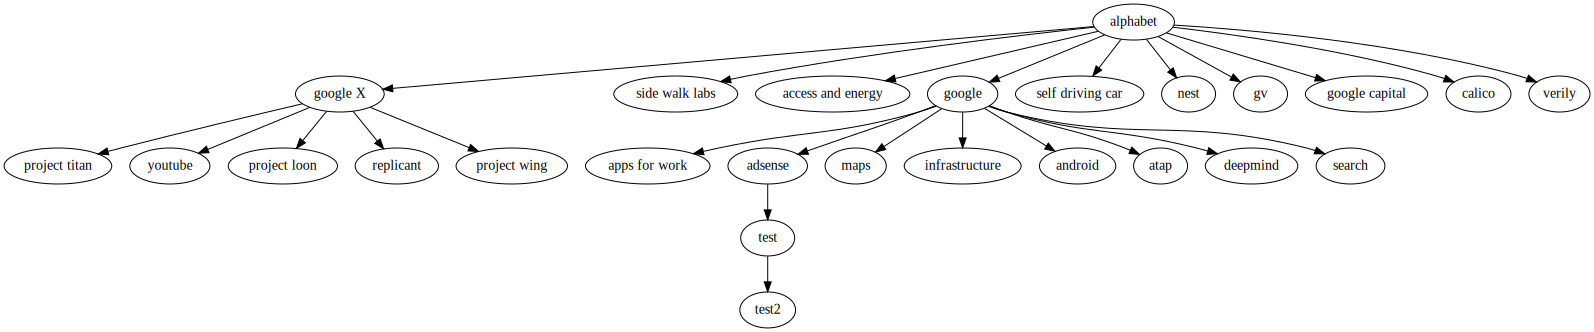

In [29]:
DotExporter(anytree).to_dotfile('orgchart.dot')

Source.from_file('orgchart.dot')

In [30]:
# an alternative way to show the chart

# anytree = list_to_anytree(working_list)
# for pre, fill, node in RenderTree(anytree):
#   print(f"{pre}{node.name}")